# Ames Housing Prices - Step 3: Feature Prep
Now that we have clean data, let's focus on making sure our features are ready for modeling.

In [1]:
# Basic setup
%run config.ipynb

Cortex Python SDK v1.1.0


In [2]:
# Connect to Cortex 5
cortex = Cortex.client()

# You can also run locally, with no need to connect to the Cortex client.
# Comment out the line cortex = Cortex.client() above and uncomment the line below
# cortex = Cortex.local()

In [7]:
# Start with the same training dataset from Step 2
train_ds = cortex.dataset('kaggle/ames-housing-train')
#train_ds.as_pandas()
train_ds.as_pandas()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.000,7917,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.000,13175,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.000,9042,Pave,None,Reg,Lvl,AllPub,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.000,9717,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2010,WD,Normal,142125


### Feature Prep Pipeline
Lets create a new pipeline that depends on our _clean_ pipeline and adds some feature prep steps.

In [7]:
pipeline = train_ds.pipeline('features', depends=['clean'], clear_cache=True)
pipeline.reset()

---
From our analysis, we remember that our target variable, _SalePrice_, is not normally distributed.  Let's scale it using the numpy _log1p_ method.

In [8]:
def scale_target(pipeline, df):
    df['SalePrice'] = np.log1p(df['SalePrice'])

pipeline.add_step(scale_target)

In [9]:
train_df = pipeline.run(pd.read_csv('../../data/kaggle/ames-housing/train.csv'))
train_ds.save()

running pipeline [clean]:
> drop_unused 
> drop_outliers 
> fill_zero_cols 
> fill_median_cols 
> fill_na_none 
running pipeline [features]:
> scale_target 


In [10]:
viz = train_ds.visuals(train_df, figsize=(24, 9))

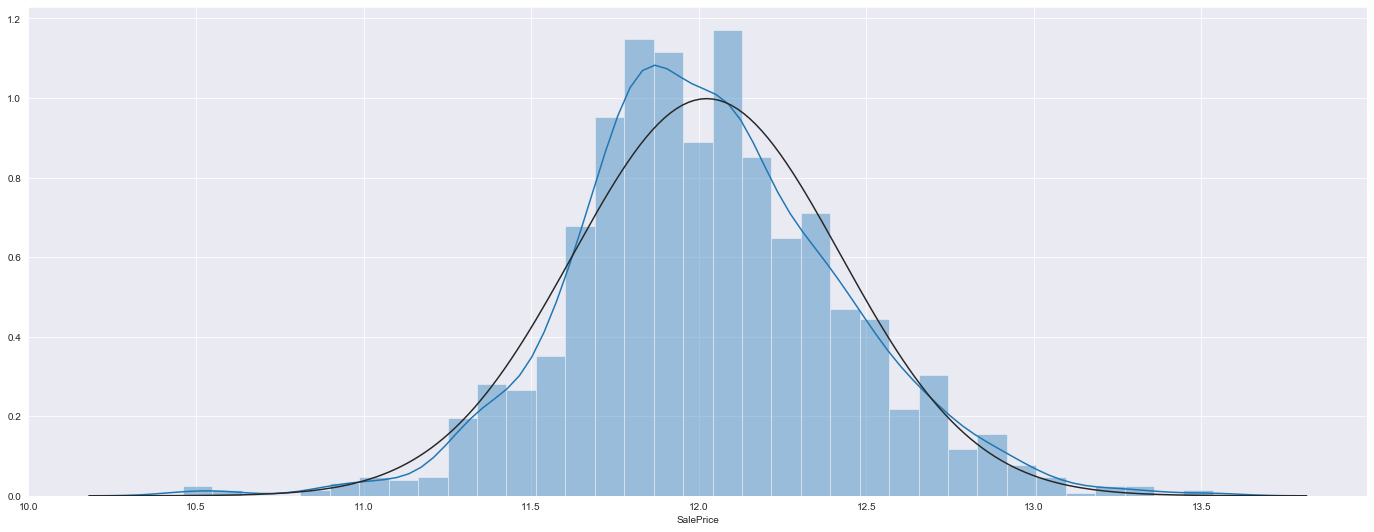

<Figure size 1728x648 with 0 Axes>

In [11]:
viz.show_dist('SalePrice')

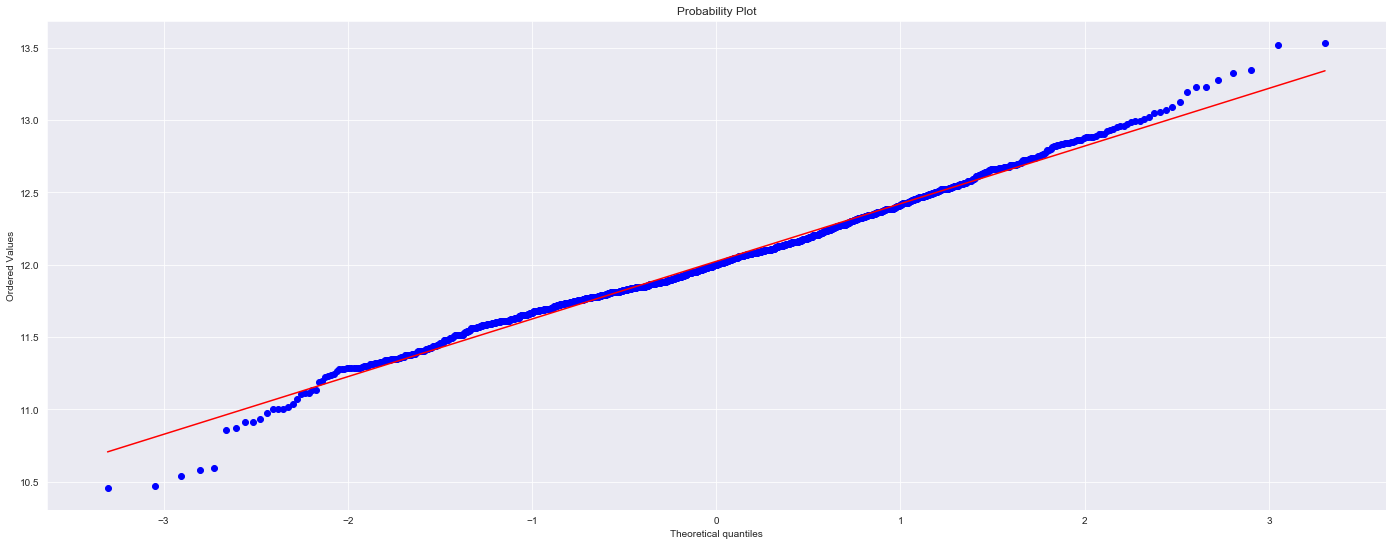

<Figure size 1728x648 with 0 Axes>

In [12]:
viz.show_probplot('SalePrice')